<a href="https://colab.research.google.com/github/anuvaagarwal/project_imdb/blob/main/Anuva_PART_I_Data_Preprocessing_Amazon_Audible.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PART I - Report and Data pre-processing for IMDb Movie Ratings Prediction
> Author: Anuva Agarwal

(Part II consisting of the ML models is in another file)


# About IMDb Data <a name="about_data"></a>

The IMDb dataset*, a comprehensive repository of information, consisted of 10.6 million + titles comprising of information on Movies, TV movies, TV Series and their respective episodes, short films, and video games. Out of these 10.6 million, we have information on ratings for only 1.4 million titles.

The data was downloaded from the IMDb website URL <[developer.imdb.com/non-commercial-datasets/](https://developer.imdb.com/non-commercial-datasets/)>. According to the website, this dataset is updated daily and there may be inconsistencies across dataframes at a given point in time, since updates take time. Note: For extra information about the dataset, visit [IMDb's documentation page](https://developer.imdb.com/documentation/key-concepts/).

*Dataset details as at Mar 16, 2024

### Problem Statement <a name="problem_statement"></a>

Build a model that predicts a movie’s average rating for titles in IMDb.



### Dataset Description <a name="dataset_description"></a>

The IMDb dataset consisted of 7 dataframes with sizes ranging from 60 million rows to 1.4 million rows (listed below). The final dataset was a result of cleaning, splitting and merging dataframes to build a model that can successfully predict a movie's ratings given information on the features.

```
Dataframe, number of rows:

df_ratings.shape[0] = 1413529
df_principals.shape[0] = 60892332
df_episode.shape[0] = 8123106
df_crew.shape[0] = 10623912
df_title_basics.shape[0] = 10621625
df_name_basics.shape[0] = 13339966
df_akas.shape[0] = 38914769
```



# Exploratory Data Analysis

## **Ratings by region**

In [ ]:
# Ratings by region
# Will not sum to 100 since 1 movie belongs to multiple categories
# Merging df_ratings with df_akas
df_b = pd.merge(df_ratings, df_akas[['tconst','region']], on='tconst', how='left')
df_b.head()

,tconst,averageRating,numVotes,log_averageRating,region
0,tt0000001,5.7,2034,1.740466,UA
1,tt0000001,5.7,2034,1.740466,DE
2,tt0000001,5.7,2034,1.740466,HU
3,tt0000001,5.7,2034,1.740466,GR
4,tt0000001,5.7,2034,1.740466,RU


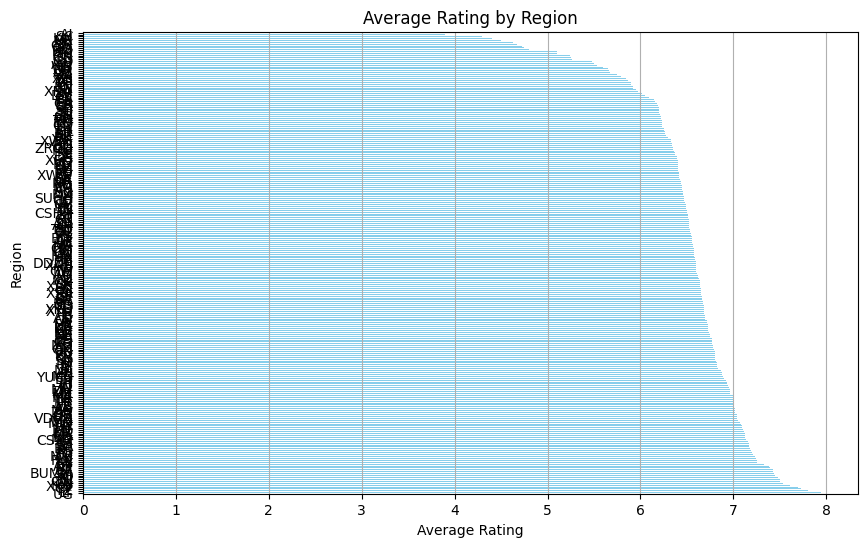

In [ ]:
# Group by 'region' and calculate the average rating
average_rating_by_region = df_b.groupby('region')['averageRating'].mean().sort_values(ascending=False)
average_rating_by_region.shape #242

# Plotting
plt.figure(figsize=(10, 6))
average_rating_by_region.plot(kind='barh', color='skyblue')
plt.xlabel('Average Rating')
plt.ylabel('Region')
plt.title('Average Rating by Region')
plt.grid(axis='x')  # Add grid lines for better readability

# Show the plot
plt.show()

The above graph looks cluttered so we will pick top 10 regions by rating and plot below:

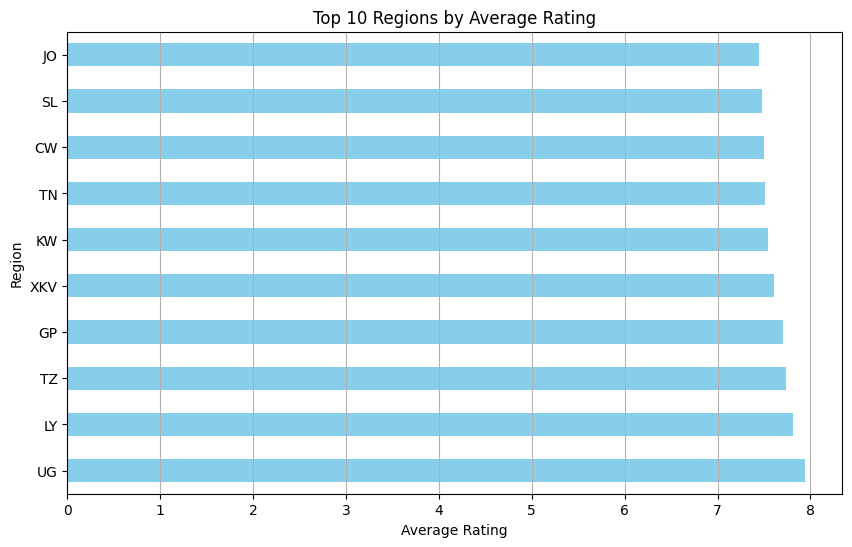

In [ ]:
# Select the top N regions
top_n_regions = 10
top_regions = average_rating_by_region.head(top_n_regions)

# Plotting
plt.figure(figsize=(10, 6))
top_regions.plot(kind='barh', color='skyblue')
plt.xlabel('Average Rating')
plt.ylabel('Region')
plt.title(f'Top {top_n_regions} Regions by Average Rating')
plt.grid(axis='x')  # Add grid lines for better readability

# Show the plot
plt.show()


## Histogram of Average Ratings

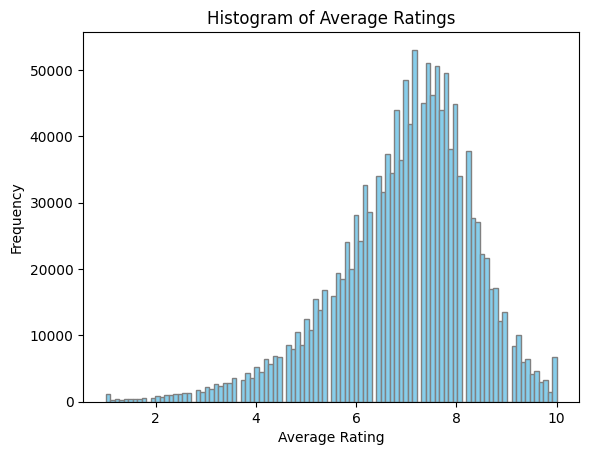

In [ ]:
# Plotting histogram of each title's average ratings
plt.hist(df_ratings['averageRating'], bins=100, color='skyblue', edgecolor='grey')
#bins = 100 since ratings are in increments of 0.1 for a 1 to 10 scale

# Add labels and title
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Average Ratings')

plt.show()

## Scatter-plot with Rating Quartiles

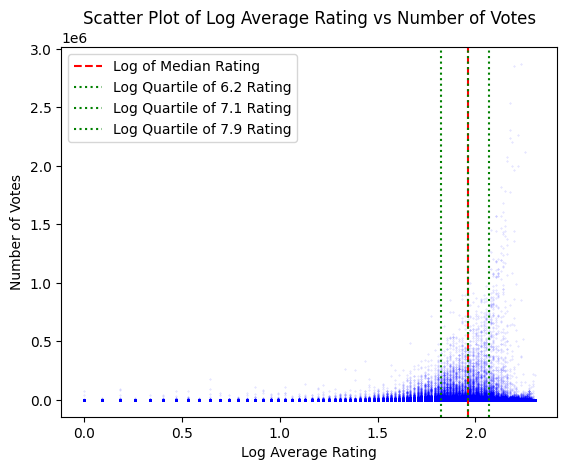

In [ ]:
#Marking Average rating quartiles
df_ratings['log_averageRating'] = np.log(df_ratings['averageRating'])
plt.scatter(df_ratings['log_averageRating'], df_ratings['numVotes'], color='blue', alpha=0.2, s = 0.1)

# Add labels and title
plt.xlabel('Log Average Rating')
plt.ylabel('Number of Votes')
plt.title('Scatter Plot of Log Average Rating vs Number of Votes')

# Calculate median and quartile ratings
median_rating = df_ratings['averageRating'].median()
quartiles = df_ratings['averageRating'].quantile([0.25, 0.5, 0.75])

# Add annotations for median and quartiles
plt.axvline(x=np.log(median_rating), color='red', linestyle='--', label='Log of Median Rating')
for q in quartiles:
    # print(q)
    plt.axvline(x=np.log(q), color='green', linestyle=':', label=f'Log Quartile of {q} Rating')

# Display legend
plt.legend()

# Display the scatter plot
plt.show()

**Checking number of data points in top 3 quartiles of average ratings.**

In [ ]:
#checking number of datapoints above and below 1st quartile
df_ratings_top = df_ratings[df_ratings['averageRating'] >= 6.2]
print("Data points in top 3 quartiles: ", df_ratings[df_ratings['averageRating'] >= 6.2].shape)

print("Data points in bottom quartile: ", df_ratings[df_ratings['averageRating'] < 6.2].shape)

Data points in top 3 quartiles:  (1075845, 4)
Data points in bottom quartile:  (337684, 4)


# Key Findings
The final dataset used for analysis consisted of 995285 rows and had the following features:

1. **averageRating**: The main label used to build the model. The Y.
2. **isAdult**: Binary variable describing whether or not a movie is a movie for adult audiences only
3. **startYear**: Release year of a title. In the case of a TV series, it is the series start year.
4. **movie_age**: Years till 2024, since release of movie
5. **runtime**: The primary runtime fo the title, in minutes. For TV series, it is the total runtime across all episodes.
6. **numRegionalTitles**: Number of regional titles i.e. how many regions was the title released in. Regional adaptations of titles are, many a times, in the local language, and these adaptations are likely to exist only if the movie is expected to be successful and hence is likely to gather higher ratings.
7. **title_region_count**: the number of geographical regions the title has been released in.
8. **Genre**: Genres include individual Documentaries, Animation films, Comedy, Romance, Biography, Crime, Fantasy, Mystery, Reality-TV, Thriller, etc. There are 28 unique genres and they have been one-hot encoded.
9. **numVotes**: Number of votes a title has received. This is a signal of the reach of a movie. While it is not a perfect signal (since not everyone who watches the title gives a rating) but assuming that the proportion of viewership (that gives a rating), across all titles, is the same, then this metric could be a useful signal of the reach of the title. This reach could span geographies, languages, and different streaming platforms.

The predictors used in the model are based on what aspects could be credible signals of movie success, which is expected to be highly correlated with rating. Unless a great movie was screened among audiences who had no access to the internet or no way to express their appreciation, this dataset is a pretty comprehensive representation of what the audience feels about each of the titles. While movie ratings could be affected by a number of confounding factors including novelty effect, loyalty effect (for actors/directors), the analysis found genre and runtime to be biggest predictors of movie ratings.

<!-- Genre information for 473,261 titles is missing. One hot encoded feature; corresponds to 27 columns. -->

<!-- 7. **Primaryprofession**: One hot encoded feature; corresponds to 11 columns. Note: 45 unique professions ƒound in df_name_basics but only 12 could be mapped to df_principals

9. **directors**:
Director(s) of a given title. Some directors are known for great movies and the faith of the audience in the director may be correlated with the rating for two (confounding) reasons - good directors produce good movies, and the name of the director may in itself invoke a 'loyalty effect' in the rating. If the ML models performs badly, then with more time, it may have been possible to build a model to tease out the causal impact of the 'loyalty effect' on movie ratings.
10. **actors**:
Actors/Actresses as protagonists in a given title. Individuals who have had a string of great movies, or are popular due to their previous work, may invoke a loyalty effect and at the same time their movies are probably going to have a higher rating because of the quality. -->


# Modelling - *Refer to PART II .ipynb

*Note that this particular portion of the analysis is in a separate .ipynb file.

I started with Linear Regression since it is a simple model that typically runs fast. Subsequently, also fit XGBoost and Random Forest model. I also used Lasso for feature importance.

Finally selected Random Forest because that performed the best on validation set using evaluation criteria of Mean Square Error (MSE). The model gave a final MSE of 1.0627 on the test set, which was a small change from the MSE of 1.0587 obtained from Random Forest model on the validation set.

Hyperparameter tuning in random forest using Random Search Cross validation failed due to computing system constraints which did not permit completion of the operation. Given more resources, it would have been nice to see the results of this type of cross validation on a random forest model with this dataset.



# Challenges

1. Computational power required for performing operations was high. Initially tried doing it on my system but when that did not work, I explored the use of Dask, a Python library for parallel and distributed computing. But when that too did not work, I tried using Kaggle notebooks and Google Colab. None of these options worked, which is when I purchased computing power on Google Colab, which then allowed me to do operations on various dataframes within the dataset, the sizes of which varied from 60million rows to 8 million rows. My personal laptop's configuraton did not permit me to perform simple operations like computing summary statistics such as mean and inter-quartile range, for eg., for the ratings dataset which has 1.4 million rows.

2. Google Colab's environment crashed multiple times and it seemed like a RAM of 50GB also fell short. My system crashed after every hour or so, and all variables would get lost. It is when I manually started deleting the dataframes in the memory of the program, did the system not crash. To save my progress, I started saving csv files at every step and marked them as checkpoints in the ipynb file.

4. Resource constraints hindered meaningful analysis - returns to time invested, are monotonically increasing, non-linear, and convex (imagine the exponential function curve). The marginal output improved with time.

5. There came a point when the system RAM was 43/50GB even when I had deleted most of the bigger dataframes from memory.

6. In the interest of time, I kept the predictors limited to the 9 main variables (and subsquent one-hot encoding) mentioned in the previous section. I wanted to include details of the primary profession but was not able to due to uncertainty about execution time and memory issues.

7. I had to keep saving versions of the dataframes I used while I was pre-processing data, so that the system doesn't crash, which happened often. Having to reload dataframes on loop, everytime the system crashed or memory reached its limit (whichever was first), added a lot of time to the data pre-processing stage. The purchased 50GB ram on Google's Colab also feel short. The merged datasets were initially 50GB in size (due to an erroneous duplication while doing a merge). after correcting that, the size was reduced to 13GB. Repeated loading of these dataframes, occupied a lot of memory. I have refrained from making multiple dataframes or objects in my code due to memory concerns - it was a trade-off between making the code more readable, vs. finalising a clean dataset for running the model.

8. Difficult to discern novelty effect for new vs. older movies.


# A Note on Possibilities with more Resources

1. In the final dataset, the column isAdult and genre_adult seem to have coefficients with opposite signs, in a linear regression prediction model for movie ratings. This needs further investigation, time and resources permitting.

2. Information on Gross revenue generated would be a strong predictor of movie success (and hence) rating. That data would have been very useful.

3. Resources permitting, I would have liked to check the performance of my model on the new dataset released on Mar 18, 2024 (as per notification on IMDb website)

4. Data on ratings change and number of votes, across years for each movie, would be a helpful statistic - more like good to know instead of a predictor of future movie ratings. It can help to know if certain movies have the characteristics to become an alltime classic, in which case targetted advertisements can be made for such titles, depending on customer demographics.

5. More time would have permitted a more granular analysis of what categories of the primary professions could have been clubbed for more meaningful inference, and to make the model less computationally intensive.

6. Testing the performance of Random Forest model with Corss Validation would have been feasible with more resources.

7. Would have liked to check if the primary profession of the director, is director, and so on and so forth. A match in the primary profession is a signal of experience and specilization, which will be positively correlated with better quality movies and hence a higher rating.

8. Dataframes renaming is not as per typical convention. For eg. there is one dataframe by 'df_movie_final_concat' and another by df_movies_final_clean'. I have marked each point hwere I saved a CSV, as a checkpoint. the last one is Checkpoint 7, which is the dataframe used in the ML model. Further processing, as required by the model, is done in the ML Model notebook.

9. This model will not work well for new movies - information on number of votes and movie age (years since release) will not be available. The present prediction model is for movies where information on these atrributes is present. With more time and computational resources, I would have liked to build a separate model for this.

10. I would also have liked to make the EDA more colourful and appealing to the non-technical audiences, in the Audible team. For eg. ratings by genre, by movie age - would have made for fun plots and discussions.

Last, but not the least, if I had more time, I would have been able to make my report more concise and readable!

# A Note on Data Cleaning

1. Some of the values (16 entries) of startYear seemed to be in the isAdult column. For some of these rows, there were no entries in startYear (and end Year). Due to proximity of column, it seemed prudent to consider this information as startYear instead of endYear. There was 1 '\N'. I am considering these 17 entries as non adult movies and imputing value 0 in these 16 cells.
2. It was strange that some movies had their release years upto 2031! There were 1070 such entries. The count by title_type, for these 1070, are as follows:
- movie           505
- tvEpisode       405
- short            72
- tvSeries         36
- videoGame        24
- tvMovie          10
- tvMiniSeries      6
- video             6
- tvSpecial         6

These were likely titles whose release date had been announced but the title wasn't released to the public yet. The title's production may or may not be have been complete.

3. Runtime seems to be a noisy signal , esp for older movies. The data has been truncated to movies between 10 and 300 minutes.

4. I removed labelled dataframes from the lines in my code, to reduce the usage of working memory. I was severely constrained on computational resources relative to the size of the dataset. The code could have been more elegant with labelled dataframes at every step, to make it more readable.

5. the dir() and del functions were very handy in regular clearing up of working memory while doing analysis on the Jupyter Notebook.

# Data Preprocessing
Information from different datatables (below) were combined and cleaned to arrive at the final dataset used in building the predictive models.

In [ ]:
# Checking memory allocation
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
# Mounting Gdrive for file access
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Mounted at /gdrive/
/gdrive


In [ ]:
!ls /gdrive/MyDrive/Datasets

df_movies_concatenated_no_encoded_profession.csv  one_hot_encoded_profession.csv
df_movies.csv					  title.akas.tsv.gz
df_movies_final_clean.csv			  title.basics.tsv.gz
df_movies_final_concat.csv			  title.crew.tsv.gz
df_movies_master.csv				  title.episode.tsv.gz
df_split_professions.csv			  title.principals.tsv.gz
name.basics.tsv.gz				  title.ratings.tsv.gz


In [ ]:
import gzip
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import sys #to check df memory allocation

In [ ]:
# Reading dataframes
df_ratings = pd.read_csv("/gdrive/MyDrive/Datasets/title.ratings.tsv.gz", compression = 'gzip', sep = '\t')
df_principals = pd.read_csv("/gdrive/MyDrive/Datasets/title.principals.tsv.gz", compression = 'gzip', sep = '\t')
df_episode = pd.read_csv("/gdrive/MyDrive/Datasets/title.episode.tsv.gz", compression = 'gzip', sep = '\t')
df_crew = pd.read_csv("/gdrive/MyDrive/Datasets/title.crew.tsv.gz", compression = 'gzip', sep = '\t')
df_title_basics = pd.read_csv("/gdrive/MyDrive/Datasets/title.basics.tsv.gz", compression = 'gzip', sep = '\t')
df_name_basics = pd.read_csv("/gdrive/MyDrive/Datasets/name.basics.tsv.gz", compression = 'gzip', sep = '\t')
df_akas = pd.read_csv("/gdrive/MyDrive/Datasets/title.akas.tsv.gz",compression = 'gzip', sep = '\t')

### Analysing Raw Dataframes

In [ ]:
# Rename the column 'titleId' to 'tconst' in df_akas
df_akas.rename(columns={'titleId': 'tconst'}, inplace=True)

# # Checking to confirm above change
# # df_akas.head()

In [ ]:
# Group the DataFrame by 'tconst' and count the number of unique regions for each group
region_counts = df_akas.groupby('tconst')['region'].nunique()

df_akas['title_region_count'] = df_akas['tconst'].map(region_counts)

# Print the DataFrame to verify the changes
df_akas.head()

tconst
tt0000001     8
tt0000002     8
tt0000003     9
tt0000004     7
tt0000005     8
tt0000006     6
tt0000007     7
tt0000008     7
tt0000009     5
tt0000010    17
Name: region, dtype: int64 (7609691,)


,tconst,ordering,title,region,language,types,attributes,isOriginalTitle,title_region_count
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0,8
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0,8
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0,8
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0,8
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0,8


In [ ]:
display(df_ratings.head(),df_ratings.shape)

,tconst,averageRating,numVotes
0,tt0000001,5.7,2034
1,tt0000002,5.7,272
2,tt0000003,6.5,1980
3,tt0000004,5.4,178
4,tt0000005,6.2,2737


(1413529, 3)

In [ ]:
display(df_title_basics.head())

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [ ]:
#Exploring the release year dates of movies
start_year_range = (df_title_basics['startYear'].replace('\\N', np.nan).dropna().min(), df_title_basics['startYear'].replace('\\N', np.nan).dropna().max())
#Result ('1874', '2031') is in string format

In [ ]:
# Convert 'startYear' column to numeric, replacing "//N" with NaN
df_title_basics['startYear'] = pd.to_numeric(df_title_basics['startYear'], errors='coerce')
#The errors='coerce' parameter ensures that non-numeric values, such as "//N", are converted to NaN

# # OR method to Replace "//N" with NaN if 'coerce not used above
# df_title_basics['startYear'] = df_title_basics['startYear'].replace(r'\N', np.nan)

# Convert the 'startYear' column to integer
df_title_basics['startYear'] = df_title_basics['startYear'].astype('Int64')

# Calculate the range of startYear while dropping NaN values
start_year_range = (df_title_basics['startYear'].dropna().min(), df_title_basics['startYear'].dropna().max())

print("Range of startYear (excluding '\\N'):", start_year_range)
print("Number of years in this range:", df_title_basics['startYear'].dropna().nunique())
print("Number of years upto 2024:", df_title_basics[df_title_basics['startYear'] <= 2024].nunique())

Range of startYear (excluding '\N'): (1874, 2031)
Number of years in this range: 152
Number of years upto 2024: tconst            9221761
titleType              11
primaryTitle      4585023
originalTitle     4607970
isAdult                 4
startYear             145
endYear                97
runtimeMinutes        958
genres               2336
dtype: int64


#### Title Name Basics

In [ ]:
# Checking Overlap b/w df_episode, df_title_basics, and df_ratings
display(display(df_title_basics.head(),df_title_basics.shape), df_title_basics.info())

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


(10621625, 9)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10621625 entries, 0 to 10621624
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 729.3+ MB


None

None

In [ ]:
# Checking how many titles in df_title_basics are there in df_rating
## Conclusion - we have rating information on only 1.4 million data points.
df_title_basics['tconst'].isin(df_ratings['tconst']).sum()

1413529

In [ ]:
df_title_basics['runtimeMinutes'].describe()

In [ ]:
runtime_range = (df_title_basics['runtimeMinutes'].dropna().min(), df_title_basics['runtimeMinutes'].dropna().max())
runtime_range

('0', '\\N')

In [ ]:
df_title_basics[df_title_basics['runtimeMinutes'] == '\\N']

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
18,tt0000019,short,The Clown Barber,The Clown Barber,0,1898,\N,\N,"Comedy,Short"
23,tt0000025,short,The Oxford and Cambridge University Boat Race,The Oxford and Cambridge University Boat Race,0,1896,\N,\N,"News,Short,Sport"
36,tt0000038,short,The Ball Game,The Ball Game,0,1898,\N,\N,"Documentary,Short,Sport"
37,tt0000039,short,Barnet Horse Fair,Barnet Horse Fair,0,1896,\N,\N,Short
38,tt0000040,short,Barque sortant du port de Trouville,Barque sortant du port de Trouville,0,1896,\N,\N,"Documentary,Short"
...,...,...,...,...,...,...,...,...,...
10621618,tt9916844,tvEpisode,Episode #3.15,Episode #3.15,0,2009,\N,\N,"Action,Drama,Family"
10621619,tt9916846,tvEpisode,Episode #3.18,Episode #3.18,0,2009,\N,\N,"Action,Drama,Family"
10621620,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2009,\N,\N,"Action,Drama,Family"
10621621,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"


In [ ]:
df_episode['parentTconst'].nunique()
#This tells use the number of average ratings we must have in the final dataset in the next line

201492

In [ ]:
#Checking intersection b/w df_title_basics and df_episodes. I later plan to collapse rating info for one TV series
# Perform inner merge on 'tconst'
merged_df = pd.merge(df_episode, df_title_basics, on='tconst', how='inner')

# Count the number of matches
num_matches = merged_df.shape[0]

# Display the number of matches
print("Number of matches based on 'tconst':", num_matches)


Number of matches based on 'tconst': 8123106


In [ ]:
#Checking intersection b/w df_ratings and df_episode
merged_df_ratings_episode = pd.merge(df_episode, df_ratings, on='tconst', how='inner')

# Count the number of matches
number_matches = merged_df_ratings_episode.shape[0]

# Display the number of matches
print("Number of matches in df_episode and df_ratings based on 'tconst':", number_matches)

Number of matches in df_episode and df_ratings based on 'tconst': 704123


In [ ]:
merged_df_ratings_episode.head()

,tconst,parentTconst,seasonNumber,episodeNumber,averageRating,numVotes
0,tt0041951,tt0041038,1,9,7.6,88
1,tt0042816,tt0989125,1,17,7.6,12
2,tt0044093,tt0959862,1,6,4.5,18
3,tt0045960,tt0044284,2,3,6.9,190
4,tt0046150,tt0341798,\N,\N,8.2,12


In [ ]:
merged_df_ratings_episode['parentTconst'].nunique()

37062

In [ ]:
# Group by 'parentTconst' and calculate the mean of 'averageRating' for each group
mean_rating_per_parent1 = merged_df_ratings_episode.groupby('parentTconst')['averageRating'].mean()

# Print the result
mean_rating_per_parent.head()

parentTconst
tt0039123    7.328571
tt0039125    6.200000
tt0040021    7.475000
tt0040041    7.311111
tt0040048    8.000000
Name: averageRating, dtype: float64

In [ ]:
mean_rating_per_parent.count()

37062

#### Release Year of Movies

In [ ]:
df_title_basics[df_title_basics['startYear'] > 2024]

In [ ]:
df_title_basics[df_title_basics['startYear'] > 2024].groupby('titleType').size()

#OR filtered_df = df_title_basics[df_title_basics['startYear'] > 2024]
# title_type_counts = filtered_df['titleType'].value_counts()
# print(title_type_counts)

titleType
movie           505
short            72
tvEpisode       405
tvMiniSeries      6
tvMovie          10
tvSeries         36
tvSpecial         6
video             6
videoGame        24
dtype: int64

In [ ]:
# Consolidating tvEpisode', 'tvSeries', 'tvMiniSeries', 'Pilot type into TV Series
df_TVseries_category = df_title_basics[df_title_basics['titleType'].isin(['tvEpisode', 'tvSeries', 'tvMiniSeries', 'Pilot'])]
df_TVseries_category.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
34970,tt0035599,tvSeries,Voice of Firestone Televues,Voice of Firestone Televues,0,1943.0,1947,15,\N
35171,tt0035803,tvSeries,The German Weekly Review,Die Deutsche Wochenschau,0,1940.0,1945,\N,"Documentary,News"
37599,tt0038276,tvSeries,You Are an Artist,You Are an Artist,0,1946.0,1955,15,Talk-Show
38433,tt0039120,tvSeries,Americana,Americana,0,1947.0,1949,30,"Family,Game-Show"
38434,tt0039121,tvSeries,Birthday Party,Birthday Party,0,1947.0,1949,30,Family


In [ ]:
df_TVseries_category['titleType'].value_counts()

tvEpisode       8123317
tvSeries         258775
tvMiniSeries      53064
Name: titleType, dtype: int64

In [ ]:
# Merging the title_regional_count with df_title_basics
a = pd.merge(df_title_basics, df_akas[['tconst','title_region_count']], on='tconst', how='left')
a.drop_duplicates(inplace=True)
a.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,title_region_count
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",8.0
8,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",8.0
16,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",9.0
25,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",7.0
33,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",8.0


In [ ]:
# del df_akas
# del df_title_basics
# dir()

In [ ]:
# dir() #ls - lrh

In [ ]:
# tconst is the common column between df_a genrated above with df_title_basics, and df_ratings,
# tconst is the common column between the result of the first merge and df_principals
# nconst is the common column between the above merge and df_name_basics

df_movies_master = pd.merge(pd.merge(pd.merge(a,
                                    df_ratings, on="tconst"),
                            df_principals, on="tconst"),
                  df_name_basics, on="nconst")

### **Export to CSV - Checkpoint 1**

In [ ]:
df_movies_master.to_csv('/gdrive/MyDrive/Datasets/df_movies_master.csv', index=False)

In [ ]:
sys.getsizeof(df_movies_master) / (1024 ** 3)  # Convert bytes to GB
#Ans formerly 51.6 GB (with accidental duplication in a join); now 13.4 GB after correction

13.431783434934914

In [ ]:
# Print the resulting DataFrame
display(df_movies_master.head(), df_movies_master.shape, df_movies_master.columns)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,title_region_count,...,ordering,nconst,category,job,characters,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",8.0,...,1,nm1588970,self,\N,"[""Self""]",Carmencita,1868,1910,soundtrack,"tt0000001,tt0057728"
1,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",8.0,...,2,nm0005690,director,\N,\N,William K.L. Dickson,1860,1935,"cinematographer,director,producer","tt0308254,tt0219560,tt1496763,tt1428455"
2,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",8.0,...,3,nm0005690,director,\N,\N,William K.L. Dickson,1860,1935,"cinematographer,director,producer","tt0308254,tt0219560,tt1496763,tt1428455"
3,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,\N,1,Short,6.0,...,1,nm0005690,director,\N,\N,William K.L. Dickson,1860,1935,"cinematographer,director,producer","tt0308254,tt0219560,tt1496763,tt1428455"
4,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,\N,1,"Short,Sport",7.0,...,3,nm0005690,director,\N,\N,William K.L. Dickson,1860,1935,"cinematographer,director,producer","tt0308254,tt0219560,tt1496763,tt1428455"


(11762630, 22)

Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'endYear', 'runtimeMinutes', 'genres',
       'title_region_count', 'averageRating', 'numVotes', 'ordering', 'nconst',
       'category', 'job', 'characters', 'primaryName', 'birthYear',
       'deathYear', 'primaryProfession', 'knownForTitles'],
      dtype='object')

In [ ]:
#Primary title is the one used by filmmakers on promotional material and this is what is available to public, and will have a higher
# affect on ratings

#Just good to know how many non-matches
# Count rows where 'primaryTitle' does not match 'originalTitle'
non_matching_count = (~df_movies_master['primaryTitle'].eq(df_movies_master['originalTitle'])).sum()
non_matching_count

898739

In [ ]:
df_movies_master['category'].value_counts()

actor                  3011519
actress                1909112
writer                 1764973
director               1215206
self                   1149532
producer                884941
composer                634110
cinematographer         541335
editor                  473188
production_designer     104049
archive_footage          72927
archive_sound             1738
Name: category, dtype: int64

In [ ]:
# Slicing the columns I need from the above dataframe
df_movies = df_movies_master[['tconst', 'titleType', 'primaryTitle', 'isAdult', 'startYear', 'runtimeMinutes',
                           'genres', 'averageRating', 'numVotes', 'nconst','category', 'primaryProfession', 'title_region_count']]

df_movies.head()

,tconst,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes,nconst,category,primaryProfession,title_region_count
0,tt0000001,short,Carmencita,0,1894,1,"Documentary,Short",5.7,2034,nm1588970,self,soundtrack,8.0
1,tt0000001,short,Carmencita,0,1894,1,"Documentary,Short",5.7,2034,nm0005690,director,"cinematographer,director,producer",8.0
2,tt0000005,short,Blacksmith Scene,0,1893,1,"Comedy,Short",6.2,2737,nm0005690,director,"cinematographer,director,producer",8.0
3,tt0000006,short,Chinese Opium Den,0,1894,1,Short,5.0,183,nm0005690,director,"cinematographer,director,producer",6.0
4,tt0000007,short,Corbett and Courtney Before the Kinetograph,0,1894,1,"Short,Sport",5.4,849,nm0005690,director,"cinematographer,director,producer",7.0


### **Export to CSV - Checkpoint 2**

In [ ]:
df_movies.to_csv('/gdrive/MyDrive/Datasets/df_movies.csv', index=False)

In [ ]:
df_movies = pd.read_csv('/gdrive/MyDrive/Datasets/df_movies.csv')

<ipython-input-36-515fa2d1b799>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_movies = pd.read_csv('/gdrive/MyDrive/Datasets/df_movies.csv')


#### Analysing Column Genre

In [ ]:
# Checking number of null values in Genre column
df_title_basics['genres'].isna().sum() #ans 18

# Convert NaN values to an empty string since column contains string data
df_title_basics['genres'] = df_title_basics['genres'].fillna('')

# Split the strings in the 'genres' column to create a list of genres for each row
genre_lists = df_title_basics['genres'].str.split(',')

# Flatten the list of lists to create a single list of genres
all_genres = [genre.strip() for sublist in genre_lists for genre in sublist if genre.strip() != '\\N' and genre.strip() != '']
unique_genres = set(all_genres) #is a set, not a list but will work for iteration

# Get the value counts of each genre
genre_value_counts = pd.Series(all_genres).value_counts()

# Print total number of genres (includes count of '\N' and empty string)
print("Number of genres:", pd.Series(all_genres).nunique()) #len(all_genres) will give total sum of all occurences of all genres

# Print the value counts of each genre
print("Value counts of each genre:")
print(genre_value_counts)

Number of genres: 28
Value counts of each genre:
Drama          3021094
Comedy         2102083
Talk-Show      1303021
Short          1158119
Documentary    1012813
Romance         989315
News            948247
Family          786794
Reality-TV      599036
Animation       535098
Crime           443831
Action          437534
Adventure       416536
Music           400039
Game-Show       387776
Adult           333731
Sport           253845
Fantasy         216033
Mystery         215141
Horror          190600
Thriller        175856
History         157288
Biography       114806
Sci-Fi          114410
Musical          89573
War              41978
Western          30440
Film-Noir          882
dtype: int64


In [ ]:
unique_genres

{'Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western'}

In [ ]:
# del a
# del df_movies_master
# dir()

In [ ]:
display(df_movies['averageRating'].isna().sum(), df_movies['averageRating'].shape)

0

(11762630,)

In [ ]:
from tqdm.notebook import tqdm  # Import tqdm for progress bar

#Convert all strings in df_movies['genres'] to lowercase
# Note that this will need all items in unique_genres to be converted too
# df_movies['genres'] = df_movies['genres'].str.lower()

# Check for missing values in 'genres' column
print("Number of missing values in 'genres' column:", df_movies['genres'].isnull().sum())

# # Fill missing values with a placeholder value
df_movies['genres'] = df_movies['genres'].fillna('unknown')

# Perform one-hot encoding for each genre separately
for genre in tqdm(unique_genres, desc='Encoding Genres'):
    df_movies[f'genre_{genre}'] = df_movies['genres'].str.contains(genre).astype(int)

Encoding Genres:   0%|          | 0/28 [00:00<?, ?it/s]

In [ ]:
display(df_movies.head(),df_movies.columns, len(df_movies.columns))

,tconst,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes,nconst,...,genre_Documentary,genre_Crime,genre_Musical,genre_Adventure,genre_Music,genre_Thriller,genre_Game-Show,genre_Romance,genre_Mystery,genre_Reality-TV
0,tt0000001,short,Carmencita,0,1894,1,"Documentary,Short",5.7,2034,nm1588970,...,1,0,0,0,0,0,0,0,0,0
1,tt0000001,short,Carmencita,0,1894,1,"Documentary,Short",5.7,2034,nm0005690,...,1,0,0,0,0,0,0,0,0,0
2,tt0000005,short,Blacksmith Scene,0,1893,1,"Comedy,Short",6.2,2737,nm0005690,...,0,0,0,0,0,0,0,0,0,0
3,tt0000006,short,Chinese Opium Den,0,1894,1,Short,5.0,183,nm0005690,...,0,0,0,0,0,0,0,0,0,0
4,tt0000007,short,Corbett and Courtney Before the Kinetograph,0,1894,1,"Short,Sport",5.4,849,nm0005690,...,0,0,0,0,0,0,0,0,0,0


Index(['tconst', 'titleType', 'primaryTitle', 'isAdult', 'startYear',
       'runtimeMinutes', 'genres', 'averageRating', 'numVotes', 'nconst',
       'category', 'primaryProfession', 'title_region_count', 'genre_Adult',
       'genre_Biography', 'genre_Action', 'genre_Film-Noir', 'genre_Animation',
       'genre_Talk-Show', 'genre_Comedy', 'genre_Horror', 'genre_Sport',
       'genre_Fantasy', 'genre_History', 'genre_News', 'genre_War',
       'genre_Family', 'genre_Western', 'genre_Sci-Fi', 'genre_Drama',
       'genre_Short', 'genre_Documentary', 'genre_Crime', 'genre_Musical',
       'genre_Adventure', 'genre_Music', 'genre_Thriller', 'genre_Game-Show',
       'genre_Romance', 'genre_Mystery', 'genre_Reality-TV'],
      dtype='object')

41

In [ ]:
df_movies['primaryProfession'].tail()

11762625                   production_manager,actor
11762626                            director,writer
11762627                                   producer
11762628                                   producer
11762629    assistant_director,editor,miscellaneous
Name: primaryProfession, dtype: object

In [ ]:
# Split the strings in the 'primaryProfession' column by commas and expand into separate columns
df_split_professions = df_movies['primaryProfession'].str.split(',', expand=True)

# Rename the columns
df_split_professions.columns = ['profession_1', 'profession_2', 'profession_3']

### Export to CSV - Checkpoint 3

In [ ]:
df_split_professions.to_csv('/gdrive/MyDrive/Datasets/df_split_professions.csv', index=False)

In [ ]:
display(df_split_professions.head(),df_split_professions.shape)

,profession_1,profession_2,profession_3
0,soundtrack,None,None
1,cinematographer,director,producer
2,cinematographer,director,producer
3,cinematographer,director,producer
4,cinematographer,director,producer


(11762630, 3)

In [ ]:
# del df_movies_master
# dir()

In [ ]:
# Concatenate df_movies and the first primary profession from df_split_professions along the columns axis (axis=1)
df_movies_concatenated = pd.concat([df_movies, df_split_professions['profession_1']], axis=1)

# Print the resulting DataFrame
df_movies_concatenated.head()

,tconst,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes,nconst,...,genre_Crime,genre_Musical,genre_Adventure,genre_Music,genre_Thriller,genre_Game-Show,genre_Romance,genre_Mystery,genre_Reality-TV,profession_1
0,tt0000001,short,Carmencita,0,1894,1,"Documentary,Short",5.7,2034,nm1588970,...,0,0,0,0,0,0,0,0,0,soundtrack
1,tt0000001,short,Carmencita,0,1894,1,"Documentary,Short",5.7,2034,nm0005690,...,0,0,0,0,0,0,0,0,0,cinematographer
2,tt0000005,short,Blacksmith Scene,0,1893,1,"Comedy,Short",6.2,2737,nm0005690,...,0,0,0,0,0,0,0,0,0,cinematographer
3,tt0000006,short,Chinese Opium Den,0,1894,1,Short,5.0,183,nm0005690,...,0,0,0,0,0,0,0,0,0,cinematographer
4,tt0000007,short,Corbett and Courtney Before the Kinetograph,0,1894,1,"Short,Sport",5.4,849,nm0005690,...,0,0,0,0,0,0,0,0,0,cinematographer


In [ ]:
# Sanity check
for c in df_movies_concatenated.columns:
  print(f"unique value counts in {c}:\n")
  print(df_movies_concatenated[c].value_counts())

In [ ]:
# Drop the 'genres' and 'primaryProfession' column in df_movies
df_movies_concatenated.drop(columns=['genres', 'primaryProfession'], inplace=True)

# Print the modified DataFrame
df_movies_concatenated.head()

,tconst,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,averageRating,numVotes,nconst,category,...,genre_Crime,genre_Musical,genre_Adventure,genre_Music,genre_Thriller,genre_Game-Show,genre_Romance,genre_Mystery,genre_Reality-TV,profession_1
0,tt0000001,short,Carmencita,0,1894,1,5.7,2034,nm1588970,self,...,0,0,0,0,0,0,0,0,0,soundtrack
1,tt0000001,short,Carmencita,0,1894,1,5.7,2034,nm0005690,director,...,0,0,0,0,0,0,0,0,0,cinematographer
2,tt0000005,short,Blacksmith Scene,0,1893,1,6.2,2737,nm0005690,director,...,0,0,0,0,0,0,0,0,0,cinematographer
3,tt0000006,short,Chinese Opium Den,0,1894,1,5.0,183,nm0005690,director,...,0,0,0,0,0,0,0,0,0,cinematographer
4,tt0000007,short,Corbett and Courtney Before the Kinetograph,0,1894,1,5.4,849,nm0005690,director,...,0,0,0,0,0,0,0,0,0,cinematographer


In [ ]:
df_movies_concatenated['profession_1'].value_counts()

In [ ]:
#Count null values in profession_1 column
df_movies_concatenated['profession_1'].isna().sum()

399808

In [ ]:
# Sanity check and delete dataframes to free up working memory

# del [df_movies, df_name_basics, df_ratings, df_split_professions]
# dir()

In [ ]:
# Perform one-hot encoding for 'profession_1' column and encode missing values as 0
one_hot_encoded_profession = pd.get_dummies(df_movies_concatenated['profession_1'], dummy_na=False, prefix='profession')

# Print the one-hot encoded DataFrame
one_hot_encoded_profession.head()

,profession_actor,profession_actress,profession_animation_department,profession_art_department,profession_art_director,profession_assistant,profession_assistant_director,profession_camera_department,profession_casting_department,profession_casting_director,...,profession_script_department,profession_set_decorator,profession_sound_department,profession_soundtrack,profession_special_effects,profession_stunts,profession_talent_agent,profession_transportation_department,profession_visual_effects,profession_writer
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Export to CSV - Checkpoint 4

In [ ]:
one_hot_encoded_profession.to_csv('/gdrive/MyDrive/Datasets/one_hot_encoded_profession.csv', index=False)

In [ ]:
#value counts
one_hot_encoded_profession.sum(axis=0)

profession_actor                        3228689
profession_actress                      2052559
profession_animation_department           53661
profession_art_department                 48814
profession_art_director                   11917
profession_assistant                          7
profession_assistant_director             41195
profession_camera_department             121274
profession_casting_department              4476
profession_casting_director                4405
profession_cinematographer               462763
profession_composer                      505055
profession_costume_department              3193
profession_costume_designer                3331
profession_director                      852277
profession_editor                        442425
profession_editorial_department           47390
profession_executive                        739
profession_legal                            149
profession_location_management             3820
profession_make_up_department           

### Export to CSV - Checkpoint 5

In [ ]:
df_movies_concatenated.to_csv('/gdrive/MyDrive/Datasets/df_movies_concatenated_no_encoded_profession.csv', index=False)

In [ ]:
# Concatenate one-hot encoded DataFrame with the original DataFrame
# df_movies_final_concat = pd.concat([df_movies_concatenated, one_hot_encoded_profession], axis=1)
df_movies_final_concat.drop(columns=['profession_1'], inplace = True)

# Print the concatenated DataFrame
print(df_movies_final_concat.columns)

display(df_movies_final_concat.head(),df_movies_final_concat.shape)

Index(['tconst', 'titleType', 'primaryTitle', 'isAdult', 'startYear',
       'runtimeMinutes', 'averageRating', 'numVotes', 'nconst', 'category',
       'title_region_count', 'genre_Adult', 'genre_Biography', 'genre_Action',
       'genre_Film-Noir', 'genre_Animation', 'genre_Talk-Show', 'genre_Comedy',
       'genre_Horror', 'genre_Sport', 'genre_Fantasy', 'genre_History',
       'genre_News', 'genre_War', 'genre_Family', 'genre_Western',
       'genre_Sci-Fi', 'genre_Drama', 'genre_Short', 'genre_Documentary',
       'genre_Crime', 'genre_Musical', 'genre_Adventure', 'genre_Music',
       'genre_Thriller', 'genre_Game-Show', 'genre_Romance', 'genre_Mystery',
       'genre_Reality-TV', 'profession_actor', 'profession_actress',
       'profession_animation_department', 'profession_art_department',
       'profession_art_director', 'profession_assistant',
       'profession_assistant_director', 'profession_camera_department',
       'profession_casting_department', 'profession_casting_d

,tconst,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,averageRating,numVotes,nconst,category,...,profession_script_department,profession_set_decorator,profession_sound_department,profession_soundtrack,profession_special_effects,profession_stunts,profession_talent_agent,profession_transportation_department,profession_visual_effects,profession_writer
0,tt0000001,short,Carmencita,0,1894,1,5.7,2034,nm1588970,self,...,0,0,0,1,0,0,0,0,0,0
1,tt0000001,short,Carmencita,0,1894,1,5.7,2034,nm0005690,director,...,0,0,0,0,0,0,0,0,0,0
2,tt0000005,short,Blacksmith Scene,0,1893,1,6.2,2737,nm0005690,director,...,0,0,0,0,0,0,0,0,0,0
3,tt0000006,short,Chinese Opium Den,0,1894,1,5.0,183,nm0005690,director,...,0,0,0,0,0,0,0,0,0,0
4,tt0000007,short,Corbett and Courtney Before the Kinetograph,0,1894,1,5.4,849,nm0005690,director,...,0,0,0,0,0,0,0,0,0,0


(11762630, 80)

###### Analysing Column isAdult

In [ ]:
# Checking string entries and non-binary values in column isAdult
df_movies_final_concat['isAdult'].value_counts()

In [ ]:
# Displaying rows where isAdult is not binary
df_movies_final_concat[df_movies_final_concat['isAdult'].isin([2020,2923,2014])]

,tconst,titleType,isAdult,startYear,runtimeMinutes,averageRating,numVotes,nconst,category,title_region_count,...,profession_script_department,profession_set_decorator,profession_sound_department,profession_soundtrack,profession_special_effects,profession_stunts,profession_talent_agent,profession_transportation_department,profession_visual_effects,profession_writer
806507,tt12149332,tvEpisode,2020,\N,"Game-Show,Reality-TV,Short",6.9,8,nm0318114,self,1.0,...,0,0,0,0,0,0,0,0,0,0
3499311,tt3984412,tvEpisode,2014,\N,"Game-Show,Reality-TV",8.3,6,nm0761631,composer,1.0,...,0,0,0,0,0,0,0,0,0,0
3544217,tt3984412,tvEpisode,2014,\N,"Game-Show,Reality-TV",8.3,6,nm0101198,self,1.0,...,0,0,0,0,0,0,0,0,0,0
4265609,tt12149332,tvEpisode,2020,\N,"Game-Show,Reality-TV,Short",6.9,8,nm1176865,self,1.0,...,0,0,0,0,0,0,0,0,0,0
4461280,tt12149332,tvEpisode,2020,\N,"Game-Show,Reality-TV,Short",6.9,8,nm0722287,writer,1.0,...,0,0,0,0,0,0,0,0,0,1
6490467,tt3984412,tvEpisode,2014,\N,"Game-Show,Reality-TV",8.3,6,nm1785993,cinematographer,1.0,...,0,0,0,0,0,0,0,0,0,0
6576410,tt3984412,tvEpisode,2014,\N,"Game-Show,Reality-TV",8.3,6,nm1829428,editor,1.0,...,0,0,0,0,0,0,0,0,0,0
7105455,tt12149332,tvEpisode,2020,\N,"Game-Show,Reality-TV,Short",6.9,8,nm0295225,writer,1.0,...,0,0,0,0,0,0,0,0,0,0
7105617,tt12149332,tvEpisode,2020,\N,"Game-Show,Reality-TV,Short",6.9,8,nm0341162,writer,1.0,...,0,0,0,0,0,0,0,0,0,1
7463423,tt12149332,tvEpisode,2020,\N,"Game-Show,Reality-TV,Short",6.9,8,nm1227859,director,1.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Create a boolean mask for the rows where isAdult matches any of the specified values
mask = df_movies_final_concat['isAdult'].isin([2020, 2023, 2014])

# Copy the values from isAdult column to startYear column where the condition is met
# mask identifies the rows where this condition is true, and these are the rows for which we
# copy the values from the isAdult column to the startYear column and replace the isAdult values with 0.
df_movies_final_concat.loc[mask, 'startYear'] = df_movies_final_concat.loc[mask, 'isAdult']

# Replace the values in isAdult column with 0 where the condition is met
df_movies_final_concat.loc[mask, 'isAdult'] = 0

# Print the updated DataFrame
df_movies_final_concat['isAdult'].value_counts()


0    11566067
1      196563
Name: isAdult, dtype: int64

In [ ]:
# dir()
# del mask

### Export to CSV - Checkpoint 6

In [ ]:
#isAdult cleaned
df_movies_final_concat.to_csv('/gdrive/MyDrive/Datasets/df_movies_final_concat.csv', index=False)

In [ ]:
# Loading clean dataset
df_movies_final_concat = pd.read_csv('/gdrive/MyDrive/Datasets/df_movies_final_concat.csv')

<ipython-input-5-9d8922bfd527>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_movies_final_concat = pd.read_csv('/gdrive/MyDrive/Datasets/df_movies_final_concat.csv')


##### Dropping column primarytitle

In [ ]:
# Dropping more unneccesary columns
df_movies_final_concat.drop(columns=['primaryTitle'], inplace = True)

In [ ]:
df_movies_final_concat['titleType'].value_counts()

tvEpisode       6060629
movie           2728070
short           1017321
tvSeries         756216
tvMovie          466101
video            401870
tvMiniSeries     131094
tvSpecial         98741
videoGame         86067
tvShort           16521
Name: titleType, dtype: int64

In [ ]:
dir()
# del all_genres
# del [df_movies_concatenated,one_hot_encoded_profession]

In [ ]:
df_movies_final_concat[df_movies_final_concat['runtimeMinutes'] == '\\N'].shape

(3148081, 79)

##### Analysing Column Primary Profession

In [ ]:
df_name_basics['primaryProfession'].head(25)

0            soundtrack,actor,miscellaneous
1                        actress,soundtrack
2       actress,soundtrack,music_department
3                   actor,soundtrack,writer
4                     writer,director,actor
5               actress,soundtrack,producer
6                 actor,soundtrack,producer
7                 actor,soundtrack,director
8                 actor,soundtrack,producer
9                 actor,soundtrack,director
10                  actor,soundtrack,stunts
11    actress,soundtrack,make_up_department
12              soundtrack,actress,producer
13                       actress,soundtrack
14                      actor,miscellaneous
15     composer,soundtrack,music_department
16      soundtrack,actress,music_department
17                actor,producer,soundtrack
18                    writer,director,actor
19                actor,producer,soundtrack
20              actress,soundtrack,producer
21                actor,soundtrack,producer
22                       soundtr

In [ ]:
# Replace missing values with an empty string
df_name_basics['primaryProfession'] = df_name_basics['primaryProfession'].fillna('')

# Convert comma-separated strings to lists of professions
profession_lists = df_name_basics['primaryProfession'].str.split(',')

# Flatten the list of lists to create a single list of professions
all_professions = [profession.strip() for sublist in profession_lists for profession in sublist]


In [ ]:
profession_lists

0                [soundtrack, actor, miscellaneous]
1                             [actress, soundtrack]
2           [actress, soundtrack, music_department]
3                       [actor, soundtrack, writer]
4                         [writer, director, actor]
                             ...                   
13339961     [animation_department, art_department]
13339962                                         []
13339963                          [cinematographer]
13339964                          [cinematographer]
13339965                                         []
Name: primaryProfession, Length: 13339966, dtype: object

In [ ]:
all_professions

In [ ]:
pd.Series(all_professions).value_counts()

actor                        3082274
                             2697718
actress                      1865491
miscellaneous                1387026
producer                     1177923
writer                        877128
camera_department             788596
director                      717325
art_department                472263
sound_department              386329
cinematographer               382743
editor                        354826
composer                      330466
music_department              268181
assistant_director            258232
visual_effects                238417
make_up_department            225434
animation_department          216539
production_manager            208404
editorial_department          188899
soundtrack                    171231
costume_department            156725
transportation_department     101728
art_director                   92845
stunts                         88363
script_department              86824
location_management            83756
p

In [ ]:
# Convert the list to a set to get unique professions
unique_professions = set(all_professions)

#Convert the set back to a list to inspect the unique professions
# Drop empty strings from the list
unique_professions_list = [profession for profession in list(unique_professions) if profession != '']

# Print the unique professions
print("Unique Professions count:", len(unique_professions_list))
print("Unique Professions", unique_professions_list)

Unique Professions count: 45
Unique Professions ['music_supervisor', 'music_department', 'talent_agent', 'production_designer', 'composer', 'camera_department', 'intimacy_coordinator', 'actress', 'costume_designer', 'choreographer', 'assistant', 'actor', 'casting_director', 'art_department', 'soundtrack', 'stunts', 'production_department', 'music_artist', 'make_up_department', 'manager', 'podcaster', 'location_management', 'publicist', 'editorial_department', 'legal', 'art_director', 'costume_department', 'assistant_director', 'executive', 'special_effects', 'set_decorator', 'producer', 'director', 'casting_department', 'electrical_department', 'cinematographer', 'miscellaneous', 'transportation_department', 'visual_effects', 'animation_department', 'writer', 'script_department', 'editor', 'sound_department', 'production_manager']


In [ ]:
# Merge df_crew and df_ratings by 'tconst'
merged_df_dir = pd.merge(df_crew, df_ratings, on='tconst', how='inner')

# Group by directors and calculate average ratings for each director
director_ratings = merged_df_dir.groupby('directors')['averageRating'].mean().reset_index()

# Sort by directors with highest rating
top_directors = director_ratings.sort_values(by='averageRating', ascending=False)

# Print the top directors by rating
print(top_directors)

         directors  averageRating
155270  nm15649615           10.0
136296  nm13308019           10.0
254886   nm4596061           10.0
231315   nm3595393           10.0
150277  nm14937664           10.0
...            ...            ...
314036   nm9176844            1.0
115763  nm11316507            1.0
299711   nm7771697            1.0
113940  nm11170393            1.0
167924   nm1812166            1.0

[321250 rows x 2 columns]


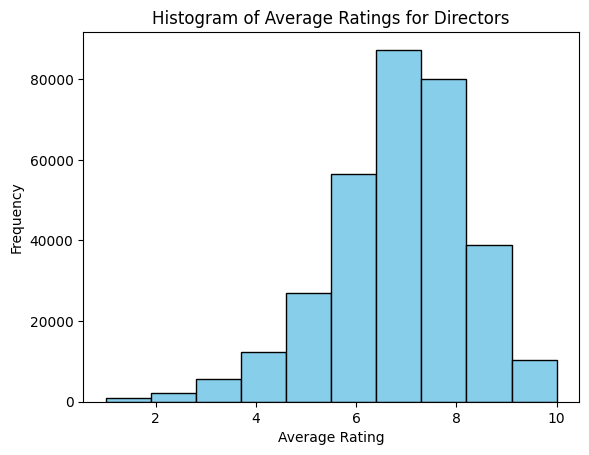

In [ ]:
# histogram of average rating in director_ratings

# Create a histogram of the average ratings
plt.hist(director_ratings['averageRating'], bins=10, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Average Ratings for Directors')

# Display the histogram
plt.show()

In [ ]:
df_name_basics['primaryProfession']

0                soundtrack,actor,miscellaneous
1                            actress,soundtrack
2           actress,soundtrack,music_department
3                       actor,soundtrack,writer
4                         writer,director,actor
                           ...                 
13339961    animation_department,art_department
13339962                                       
13339963                        cinematographer
13339964                        cinematographer
13339965                                       
Name: primaryProfession, Length: 13339966, dtype: object

In [ ]:
df_name_basics['primaryProfession'].str.split(',')

0                [soundtrack, actor, miscellaneous]
1                             [actress, soundtrack]
2           [actress, soundtrack, music_department]
3                       [actor, soundtrack, writer]
4                         [writer, director, actor]
                             ...                   
13339961     [animation_department, art_department]
13339962                                         []
13339963                          [cinematographer]
13339964                          [cinematographer]
13339965                                         []
Name: primaryProfession, Length: 13339966, dtype: object

In [ ]:
# Split 'primaryProfession' column into three columns
split_columns = df_name_basics['primaryProfession'].str.split(',', expand=True)

# Rename the columns
split_columns.columns = ['profession_1', 'profession_2', 'profession_3']

# Fill missing elements with zeros
split_columns = split_columns.fillna(0)

# Print the resulting DataFrame
print(split_columns)

                  profession_1    profession_2      profession_3
0                   soundtrack           actor     miscellaneous
1                      actress      soundtrack                 0
2                      actress      soundtrack  music_department
3                        actor      soundtrack            writer
4                       writer        director             actor
...                        ...             ...               ...
13339961  animation_department  art_department                 0
13339962                                     0                 0
13339963       cinematographer               0                 0
13339964       cinematographer               0                 0
13339965                                     0                 0

[13339966 rows x 3 columns]


In [ ]:
# Calculate unique values in each column
unique_values = split_columns.nunique()

# Print the unique values
print(unique_values)

profession_1    45
profession_2    43
profession_3    41
dtype: int64


In [ ]:
split_columns[split_columns['profession_1'] == 0]['profession_1'].count()

0

In [ ]:
characteristics = df_name_basics['primaryProfession'].str.split(',')
characteristics

0                [soundtrack, actor, miscellaneous]
1                             [actress, soundtrack]
2           [actress, soundtrack, music_department]
3                       [actor, soundtrack, writer]
4                         [writer, director, actor]
                             ...                   
13339961     [animation_department, art_department]
13339962                                         []
13339963                          [cinematographer]
13339964                          [cinematographer]
13339965                                         []
Name: primaryProfession, Length: 13339966, dtype: object

In [ ]:
df_crew['directors'].nunique()

933786

##### Analysing Column RuntimeMinutes



In [ ]:
df_movies_final_concat['runtimeMinutes'].value_counts()

\N      3148081
30       432791
60       371822
22       358180
90       279039
         ...   
5700          1
4800          1
642           1
9000          1
2160          1
Name: runtimeMinutes, Length: 806, dtype: int64

In [ ]:
#Checking if the missing '\N' value is concentrated in a certain titletype - mostly tvepisodes
df_movies_final_concat[df_movies_final_concat['runtimeMinutes'] == '\\N'].groupby('titleType').size()

titleType
movie            245991
short            105435
tvEpisode       2166832
tvMiniSeries      51732
tvMovie           66402
tvSeries         322956
tvShort            1394
tvSpecial         37437
video             64791
videoGame         85111
dtype: int64

In [ ]:
# Display the counts of runtimeMinutes for values that are empty, '\N', or have strings
print("Number of empty values:", df_movies_final_concat['runtimeMinutes'].isnull().sum())
print("Number of '\\N' values:", (df_movies_final_concat['runtimeMinutes'] == '\\N').sum())
print("Number of non-numeric values:", pd.to_numeric(df_movies_final_concat['runtimeMinutes'], errors='coerce').isnull().sum())

Number of empty values: 0
Number of '\N' values: 3148081
Number of non-numeric values: 3148110


In [ ]:
# Checking number of unique titles
df_movies_final_concat['tconst'].nunique()

1390754

In a dataframe of ~11.7 million rows with 1.39 million unique titles, information on runtime was missing for ~6.3 million rows. In the interest of time, I am restricting my analysis to the 995376 rows where information on runtime is present for titles. Further exploration will be needed to make a decision on how to impute missing runtime values to do justice to its predictive power for movie ratings.

**Tells me number of rows for which information on runtime is present**

In [ ]:
# Convert 'runtimeMinutes' column to numeric type, coercing errors to NaN
# Filter rows where 'runtimeMinutes' is numeric (see portion inside [])
# Count number of rows where 'runtimeMinutes' is numeric
numeric_runtime_rows = df_movies_final_concat[pd.to_numeric(df_movies_final_concat['runtimeMinutes'],
                                                            errors='coerce').notna()]

print("Number of rows where 'runtimeMinutes' is numeric:", numeric_runtime_rows.shape[0])
print("Number of unique tconst values:", numeric_runtime_rows['tconst'].nunique())

Number of rows where 'runtimeMinutes' is numeric: 8614520
Number of unique tconst values: 995376


In [ ]:
# dir()
# del numeric_runtime_rows
# del mask
# del numeric_runtime_rows_release_date

In [ ]:
display(numeric_runtime_rows.head(), numeric_runtime_rows.shape)

,tconst,titleType,isAdult,startYear,runtimeMinutes,averageRating,numVotes,nconst,category,title_region_count,...,profession_script_department,profession_set_decorator,profession_sound_department,profession_soundtrack,profession_special_effects,profession_stunts,profession_talent_agent,profession_transportation_department,profession_visual_effects,profession_writer
0,tt0000001,short,0,1894,1.0,5.7,2034,nm1588970,self,8.0,...,0,0,0,1,0,0,0,0,0,0
1,tt0000001,short,0,1894,1.0,5.7,2034,nm0005690,director,8.0,...,0,0,0,0,0,0,0,0,0,0
2,tt0000005,short,0,1893,1.0,6.2,2737,nm0005690,director,8.0,...,0,0,0,0,0,0,0,0,0,0
3,tt0000006,short,0,1894,1.0,5.0,183,nm0005690,director,6.0,...,0,0,0,0,0,0,0,0,0,0
4,tt0000007,short,0,1894,1.0,5.4,849,nm0005690,director,7.0,...,0,0,0,0,0,0,0,0,0,0


(8614520, 79)

In [ ]:
# Check if any duplicate titles in 'tconst' column
print("There are duplicate titles. The number " + f"{numeric_runtime_rows['tconst'].nunique()} from numeric_runtime_rows['tconst'].nunique() is less than output in numeric_runtime_rows.shape = 8614520 rows")


There are duplicate titles. The number 995376 from numeric_runtime_rows['tconst'].nunique() is less than output in numeric_runtime_rows.shape = 8614520 rows


In [ ]:
numeric_runtime_rows[~numeric_runtime_rows.duplicated(subset=['tconst'])].head()

,tconst,titleType,isAdult,startYear,runtimeMinutes,averageRating,numVotes,nconst,category,title_region_count,...,profession_script_department,profession_set_decorator,profession_sound_department,profession_soundtrack,profession_special_effects,profession_stunts,profession_talent_agent,profession_transportation_department,profession_visual_effects,profession_writer
0,tt0000001,short,0,1894,1.0,5.7,2034,nm1588970,self,8.0,...,0,0,0,1,0,0,0,0,0,0
2,tt0000005,short,0,1893,1.0,6.2,2737,nm0005690,director,8.0,...,0,0,0,0,0,0,0,0,0,0
3,tt0000006,short,0,1894,1.0,5.0,183,nm0005690,director,6.0,...,0,0,0,0,0,0,0,0,0,0
4,tt0000007,short,0,1894,1.0,5.4,849,nm0005690,director,7.0,...,0,0,0,0,0,0,0,0,0,0
5,tt0000008,short,0,1894,1.0,5.4,2179,nm0005690,director,7.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Filtering rows from numeric_runtime where tconst unique
# Replacing numeric_runtime_rows with tconst unique
numeric_runtime_tconst = numeric_runtime_rows[~numeric_runtime_rows.duplicated(subset=['tconst'])]

In [ ]:
# Calculating number of rows where information on release date for the title is unavailable
print("Number of rows for which release date information is unavailable: ",
      numeric_runtime_tconst[numeric_runtime_tconst['startYear'] == '\\N'].shape[0])

#Filter rows where release date information is available
numeric_runtime_tconst_release_date = numeric_runtime_tconst[pd.to_numeric(numeric_runtime_tconst
 ['startYear'], errors='coerce').notna()]

display(numeric_runtime_tconst_release_date.head(),numeric_runtime_tconst_release_date.shape)

Number of rows for which release date information is unavailable:  91


,tconst,titleType,isAdult,startYear,runtimeMinutes,averageRating,numVotes,nconst,category,title_region_count,...,profession_script_department,profession_set_decorator,profession_sound_department,profession_soundtrack,profession_special_effects,profession_stunts,profession_talent_agent,profession_transportation_department,profession_visual_effects,profession_writer
0,tt0000001,short,0,1894,1.0,5.7,2034,nm1588970,self,8.0,...,0,0,0,1,0,0,0,0,0,0
2,tt0000005,short,0,1893,1.0,6.2,2737,nm0005690,director,8.0,...,0,0,0,0,0,0,0,0,0,0
3,tt0000006,short,0,1894,1.0,5.0,183,nm0005690,director,6.0,...,0,0,0,0,0,0,0,0,0,0
4,tt0000007,short,0,1894,1.0,5.4,849,nm0005690,director,7.0,...,0,0,0,0,0,0,0,0,0,0
5,tt0000008,short,0,1894,1.0,5.4,2179,nm0005690,director,7.0,...,0,0,0,0,0,0,0,0,0,0


(995285, 79)

In [ ]:
# Calculate the minimum and maximum values of the 'startYear' column
print("Minimum start year:", pd.to_numeric(numeric_runtime_tconst_release_date['startYear']).min())
print("Maximum start year:", pd.to_numeric(numeric_runtime_tconst_release_date['startYear']).max())


Minimum start year: 1874
Maximum start year: 2024


In [ ]:
# Dropping columns on profession, people, and category, in the interest of time
numeric_runtime_tconst_release_date.columns
df_movies_final_clean = numeric_runtime_tconst_release_date.drop(columns=
 ['nconst', 'category', 'profession_actor', 'profession_actress',
       'profession_animation_department', 'profession_art_department',
       'profession_art_director', 'profession_assistant',
       'profession_assistant_director', 'profession_camera_department',
       'profession_casting_department', 'profession_casting_director',
       'profession_cinematographer', 'profession_composer',
       'profession_costume_department', 'profession_costume_designer',
       'profession_director', 'profession_editor',
       'profession_editorial_department', 'profession_executive',
       'profession_legal', 'profession_location_management',
       'profession_make_up_department', 'profession_manager',
       'profession_miscellaneous', 'profession_music_artist',
       'profession_music_department', 'profession_music_supervisor',
       'profession_podcaster', 'profession_producer',
       'profession_production_designer', 'profession_production_manager',
       'profession_publicist', 'profession_script_department',
       'profession_set_decorator', 'profession_sound_department',
       'profession_soundtrack', 'profession_special_effects',
       'profession_stunts', 'profession_talent_agent',
       'profession_transportation_department', 'profession_visual_effects',
       'profession_writer'])
display(df_movies_final_clean.head(), df_movies_final_clean.shape)

,tconst,titleType,isAdult,startYear,runtimeMinutes,averageRating,numVotes,title_region_count,genre_Adult,genre_Biography,...,genre_Documentary,genre_Crime,genre_Musical,genre_Adventure,genre_Music,genre_Thriller,genre_Game-Show,genre_Romance,genre_Mystery,genre_Reality-TV
0,tt0000001,short,0,1894,1.0,5.7,2034,8.0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,tt0000005,short,0,1893,1.0,6.2,2737,8.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0000006,short,0,1894,1.0,5.0,183,6.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,tt0000007,short,0,1894,1.0,5.4,849,7.0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,tt0000008,short,0,1894,1.0,5.4,2179,7.0,0,0,...,1,0,0,0,0,0,0,0,0,0


(995285, 36)

In [ ]:
# Calculate movie age, add column to dataframe
current_year = 2024
df_movies_final_clean['movie_age'] = current_year - pd.to_numeric(df_movies_final_clean['startYear'])
display(df_movies_final_clean.head(), df_movies_final_clean.shape)

,tconst,titleType,isAdult,startYear,runtimeMinutes,averageRating,numVotes,title_region_count,genre_Adult,genre_Biography,...,genre_Crime,genre_Musical,genre_Adventure,genre_Music,genre_Thriller,genre_Game-Show,genre_Romance,genre_Mystery,genre_Reality-TV,movie_age
0,tt0000001,short,0,1894,1.0,5.7,2034,8.0,0,0,...,0,0,0,0,0,0,0,0,0,130
2,tt0000005,short,0,1893,1.0,6.2,2737,8.0,0,0,...,0,0,0,0,0,0,0,0,0,131
3,tt0000006,short,0,1894,1.0,5.0,183,6.0,0,0,...,0,0,0,0,0,0,0,0,0,130
4,tt0000007,short,0,1894,1.0,5.4,849,7.0,0,0,...,0,0,0,0,0,0,0,0,0,130
5,tt0000008,short,0,1894,1.0,5.4,2179,7.0,0,0,...,0,0,0,0,0,0,0,0,0,130


(995285, 37)

In [ ]:
df_movies_final_clean.columns

Index(['tconst', 'titleType', 'isAdult', 'startYear', 'runtimeMinutes',
       'averageRating', 'numVotes', 'title_region_count', 'genre_Adult',
       'genre_Biography', 'genre_Action', 'genre_Film-Noir', 'genre_Animation',
       'genre_Talk-Show', 'genre_Comedy', 'genre_Horror', 'genre_Sport',
       'genre_Fantasy', 'genre_History', 'genre_News', 'genre_War',
       'genre_Family', 'genre_Western', 'genre_Sci-Fi', 'genre_Drama',
       'genre_Short', 'genre_Documentary', 'genre_Crime', 'genre_Musical',
       'genre_Adventure', 'genre_Music', 'genre_Thriller', 'genre_Game-Show',
       'genre_Romance', 'genre_Mystery', 'genre_Reality-TV', 'movie_age'],
      dtype='object')

In [ ]:
new_column_order = ['tconst', 'titleType', 'isAdult', 'startYear', 'movie_age', 'runtimeMinutes',
       'averageRating', 'numVotes', 'title_region_count', 'genre_Adult',
       'genre_Biography', 'genre_Action', 'genre_Film-Noir', 'genre_Animation',
       'genre_Talk-Show', 'genre_Comedy', 'genre_Horror', 'genre_Sport',
       'genre_Fantasy', 'genre_History', 'genre_News', 'genre_War',
       'genre_Family', 'genre_Western', 'genre_Sci-Fi', 'genre_Drama',
       'genre_Short', 'genre_Documentary', 'genre_Crime', 'genre_Musical',
       'genre_Adventure', 'genre_Music', 'genre_Thriller', 'genre_Game-Show',
       'genre_Romance', 'genre_Mystery', 'genre_Reality-TV']

In [ ]:
# Reindex the DataFrame with the new column order
df_movies_final_clean = df_movies_final_clean.reindex(columns=new_column_order)

df_movies_final_clean.head(10)

,tconst,titleType,isAdult,startYear,movie_age,runtimeMinutes,averageRating,numVotes,title_region_count,genre_Adult,...,genre_Documentary,genre_Crime,genre_Musical,genre_Adventure,genre_Music,genre_Thriller,genre_Game-Show,genre_Romance,genre_Mystery,genre_Reality-TV
0,tt0000001,short,0,1894,130,1.0,5.7,2034,8.0,0,...,1,0,0,0,0,0,0,0,0,0
2,tt0000005,short,0,1893,131,1.0,6.2,2737,8.0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0000006,short,0,1894,130,1.0,5.0,183,6.0,0,...,0,0,0,0,0,0,0,0,0,0
4,tt0000007,short,0,1894,130,1.0,5.4,849,7.0,0,...,0,0,0,0,0,0,0,0,0,0
5,tt0000008,short,0,1894,130,1.0,5.4,2179,7.0,0,...,1,0,0,0,0,0,0,0,0,0
6,tt0000036,short,0,1896,128,1.0,4.4,620,3.0,0,...,0,0,0,0,0,0,0,0,0,0
8,tt0000076,short,0,1896,128,1.0,4.5,550,3.0,0,...,0,0,0,0,0,0,0,0,0,0
10,tt0000108,short,0,1896,128,1.0,4.4,559,3.0,0,...,0,0,0,0,0,0,0,0,0,0
11,tt0000109,short,0,1896,128,1.0,4.5,540,3.0,0,...,0,0,0,0,0,0,0,0,0,0
12,tt0000110,short,0,1896,128,1.0,4.4,546,3.0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_title_basics[df_title_basics['runtimeMinutes'] != '\\N']

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
10621575,tt9916754,movie,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,0,2013,\N,49,Documentary
10621581,tt9916766,tvEpisode,Episode #10.15,Episode #10.15,0,2019,\N,43,"Family,Game-Show,Reality-TV"
10621616,tt9916840,tvEpisode,Horrid Henry's Comic Caper,Horrid Henry's Comic Caper,0,2014,\N,11,"Adventure,Animation,Comedy"
10621623,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short


### Export to CSV - Checkpoint 7

In [ ]:
df_movies_final_clean.to_csv('/gdrive/MyDrive/Datasets/df_movies_final_clean.csv', index=False)

### North Star: Summary of dataframe in the works
Helped me get a quick count on the status of the dataframe and which next variable required cleaning. I kept editing this to reflect the latest dataframe I was working with.

In [ ]:
for c in df_movies_final_clean.columns:
  print(f"unique value counts in {c}:\n")
  print(df_movies_final_clean[c].value_counts())

unique value counts in tconst:

tt0000001    1
tt8041070    1
tt2047885    1
tt2239034    1
tt2480784    1
            ..
tt9783910    1
tt9783922    1
tt0085474    1
tt0123073    1
tt9914392    1
Name: tconst, Length: 995285, dtype: int64
unique value counts in titleType:

tvEpisode       425372
movie           275439
short           137407
tvSeries         50237
tvMovie          44139
video            43389
tvMiniSeries      9352
tvSpecial         7738
tvShort           2084
videoGame          128
Name: titleType, dtype: int64
unique value counts in isAdult:

0    978378
1     16907
Name: isAdult, dtype: int64
unique value counts in startYear:

2017    23039
2016    22666
2018    22562
2019    22131
2015    21723
        ...  
1883        1
1882        1
1874        1
1882        1
1888        1
Name: startYear, Length: 281, dtype: int64
unique value counts in movie_age:

7      41728
8      41161
6      40865
5      40579
9      38151
       ...  
142        2
135        2
150      